<a href="https://colab.research.google.com/github/AlumiK/bagel-tensorflow/blob/main/notebooks/bagel_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagel Playground

Check runtime type (CPU or GPU):

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2386e4ef-38fa-0f47-a0d1-1d23f39c1598)


Clone the repo and install Bagel:

In [2]:
CODE_DIR = 'bagel-tensorflow'

!git clone https://github.com/AlumiK/bagel-tensorflow.git $CODE_DIR
%cd $CODE_DIR
!pip install -e .

Cloning into 'bagel-tensorflow'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 179 (delta 100), reused 126 (delta 56), pack-reused 0
Receiving objects: 100% (179/179), 2.64 MiB | 22.13 MiB/s, done.
Resolving deltas: 100% (100/100), done.
/content/bagel-tensorflow
Obtaining file:///content/bagel-tensorflow
  Running setup.py develop for bagel-tensorflow


Import libraries:

In [3]:
import os
import bagel
import matplotlib.pyplot as plt

Set some parameters:

In [4]:
EPOCHS = 50
INPUT = os.path.join('sample', 'data')

Run Bagel:

KPI: server_res_eth1out_curve_6
Training Epoch
50/50 [==============================] - 11s 216ms/step - loss: -127.2963 - val_loss: -88.7854
Testing Epoch
21/21 [==============================] - 2s 108ms/step - test_loss: -111.1471
Metrics
precision: 1.000 - recall: 1.000 - f1score: 1.000



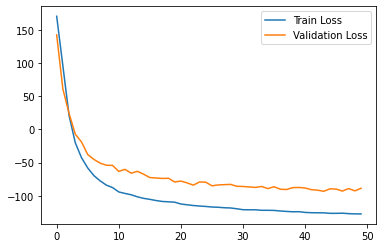

KPI: cpu4
Training Epoch
50/50 [==============================] - 9s 186ms/step - loss: -69.5310 - val_loss: -64.7015
Testing Epoch
21/21 [==============================] - 2s 105ms/step - test_loss: -61.4450
Metrics
precision: 0.933 - recall: 1.000 - f1score: 0.966



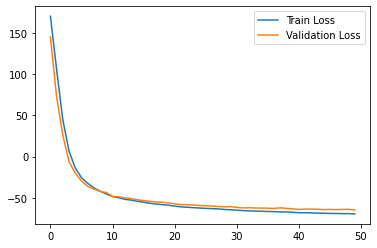

KPI: g
Training Epoch
50/50 [==============================] - 99s 2s/step - loss: -37.3737 - val_loss: 40.8137
Testing Epoch
253/253 [==============================] - 4s 16ms/step - test_loss: -6.9594
Metrics
precision: 0.923 - recall: 0.755 - f1score: 0.831



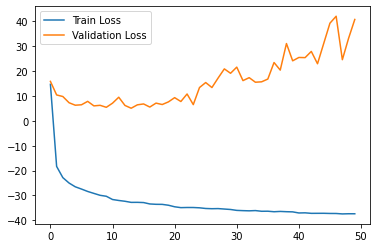

KPI: server_res_eth1out_curve_61
Training Epoch
50/50 [==============================] - 9s 176ms/step - loss: -121.2256 - val_loss: -99.6912
Testing Epoch
21/21 [==============================] - 2s 105ms/step - test_loss: -65.3346
Metrics
precision: 0.888 - recall: 0.933 - f1score: 0.910



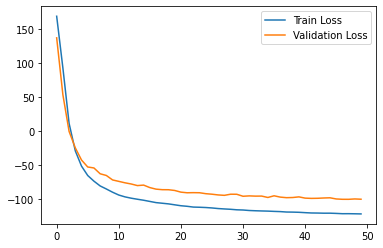

In [5]:
file_list = bagel.utils.file_list(INPUT)
for file in file_list:
    # Read KPI data
    kpi = bagel.utils.load_kpi(file)
    print(f'KPI: {kpi.name}')

    # Fill missing points with 0
    kpi.complete_timestamp()

    # Split the KPI and standardize them
    train_kpi, valid_kpi, test_kpi = kpi.split((0.49, 0.21, 0.3))
    train_kpi, mean, std = train_kpi.standardize()
    valid_kpi, _, _ = valid_kpi.standardize(mean=mean, std=std)
    test_kpi, _, _ = test_kpi.standardize(mean=mean, std=std)

    # Create a Bagel instance
    model = bagel.models.Bagel()

    # Train and test
    r = model.fit(kpi=train_kpi.use_labels(0.),
                  validation_kpi=valid_kpi,
                  epochs=EPOCHS,
                  verbose=1)
    anomaly_scores = model.predict(test_kpi)
    results = bagel.testing.get_test_results(labels=test_kpi.labels,
                                             scores=anomaly_scores,
                                             missing=test_kpi.missing)
    
    # Print metrics
    print('Metrics')
    print(f'precision: {results.get("precision"):.3f} - '
          f'recall: {results.get("recall"):.3f} - '
          f'f1score: {results.get("f1score"):.3f}\n')
    
    # Plot losses
    plt.plot(r.get('loss'), label='Train Loss')
    plt.plot(r.get('val_loss'), label='Validation Loss')
    plt.legend()
    plt.show()